In [3]:
#logical indexing exercise question

from sklearn.datasets import load_iris
iris = load_iris()       
print iris.DESCR
iris_attr = iris.data
species = iris.target
print iris.feature_names

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
index = (iris_attr[:, 1] < 2.5)
sample = iris_attr[index, :]
print sample

[[4.5 2.3 1.3 0.3]
 [5.5 2.3 4.  1.3]
 [4.9 2.4 3.3 1. ]
 [5.  2.  3.5 1. ]
 [6.  2.2 4.  1. ]
 [6.2 2.2 4.5 1.5]
 [5.5 2.4 3.8 1.1]
 [5.5 2.4 3.7 1. ]
 [6.3 2.3 4.4 1.3]
 [5.  2.3 3.3 1. ]
 [6.  2.2 5.  1.5]]


In [79]:
import numpy as np
np.mean(sample[:, 0])

5.49090909090909

In [9]:
#Data Visualization
from matplotlib import pyplot as plt

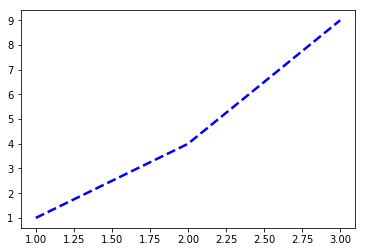

In [10]:
#line plot
x = [1,2,3]
y = [1,4,9]

plt.plot(x,y, "--", color = 'b', linewidth = 2.5)

plt.show()

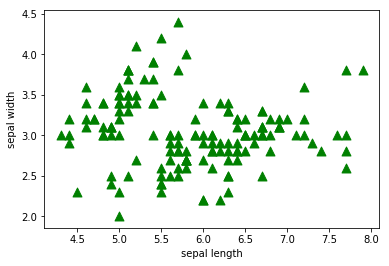

In [12]:
#scatter plot
plt.scatter(iris_attr[:,0], iris_attr[:,1], s = 80, c = 'g', marker = '^')

plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

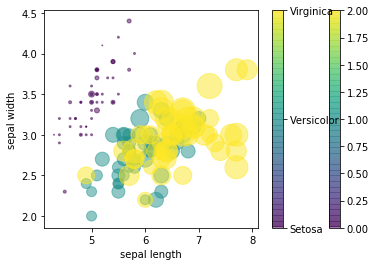

In [77]:
#Bubble chart with multi-dimensional visualization in the scatter plot
target = iris.target
# iris_attr[:,0] sepal length
# iris_attr[:,1] sepal width
# iris_attr[:,3] petal width
plt.scatter(iris_attr[:,0], iris_attr[:,1], s = 100 * iris_attr[:, 3] ** 2, c = target, alpha = 0.5)  
#no '' for target because target is a variable here, not a string (strings are workds like John, Seatle with no meaning) 
#"target" variable contains number 0,1,2 
#"alpha" varies from 0(transparent color) to 1(solid color) and means the transparency of the color
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.colorbar()     # alternative: plt.colorbar(ticks=[0,1,2]) (ticks are the positions that numbers are set)

cbar = plt.colorbar(ticks=[0,1,2])                          #optional
cbar.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])  #optional

plt.show()

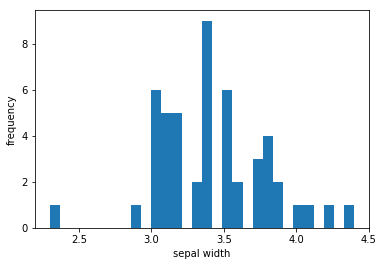

In [38]:
#Histogram
target = iris.target
select_index = target == 0     #generate logical values based on whether Setosa
setosa = iris_attr[select_index, :]
num_bins = 30                # number of bins usually from 10 to 30
plt.hist(setosa[:, 1], num_bins)

plt.xlabel('sepal width')
plt.ylabel('frequency')

plt.show()

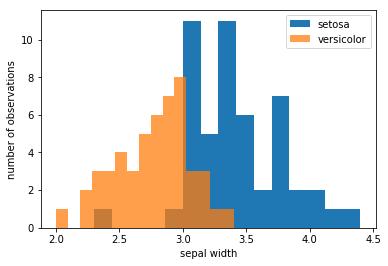

In [80]:
#Overlaid Histogram
target = iris.target

setosa = iris_attr[target == 0, :]
versicolor = iris_attr[target == 1, :]
num_bins = 15
plt.hist(setosa[:, 1], num_bins, alpha =1)
plt.hist(versicolor[:, 1], num_bins, alpha = 0.75)  # the second will cover on the top of the first color
                                                    # so set up the second alpha= 0.75 (not 1 because of 1 = solid color)

plt.xlabel('sepal width')
plt.ylabel('number of observations')

plt.legend(['setosa', 'versicolor'])

plt.show()

In [43]:
#bike share example questions
import pandas as pd
daily = pd.read_csv("day.csv")
daily.head()

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.160446,331,654,985
1,2,1,0,0,2,0.363478,0.248539,131,670,801
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600


In [44]:
attr = daily.values   # will be given, just like a syntax
print type(attr)   #make sure it is a numpy array

<type 'numpy.ndarray'>


In [45]:
print daily.columns.values

['day' 'season' 'weekday' 'workingday' 'weathersit' 'temp' 'windspeed'
 'casual' 'registered' 'cnt']


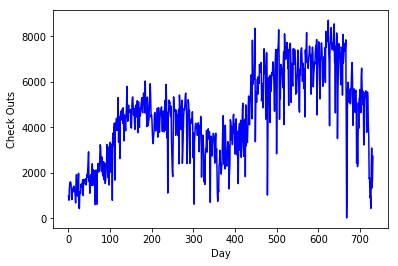

In [64]:
#1
from matplotlib import pyplot as plt

x = attr[:, 0]
y = attr[:, 9]

plt.plot(x,y, color = 'b')

plt.xlabel('Day')
plt.ylabel('Check Outs')   

plt.show()                  #conclusion: market share of the company is increasing and it is doing well

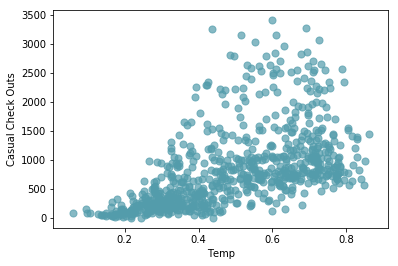

In [65]:
#2
plt.scatter(attr[:,5], attr[:,7], s = 50, c = '#539cab', alpha = 0.7)

plt.xlabel('Temp')
plt.ylabel('Casual Check Outs')      #because we say "casual against temp" in the question so xlabel is the temp

plt.show()                    #conclusion: as the temp is higher, we have more check outs.

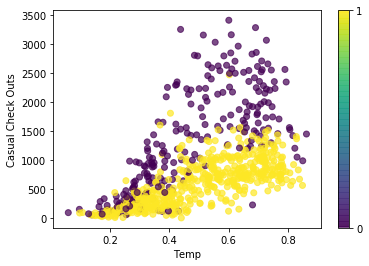

In [69]:
#3
target =attr[:,3] == 1 

plt.scatter(attr[:,5], attr[:,7], c = target, alpha = 0.7)

plt.xlabel('Temp')
plt.ylabel('Casual Check Outs')

plt.colorbar(ticks=[0,1])

plt.show()

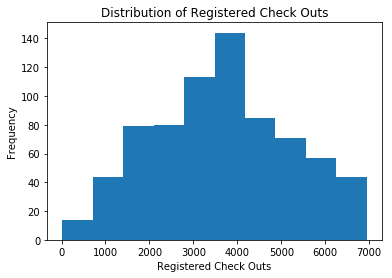

In [70]:
#4
num_bins = 10                
plt.hist(attr[:,8], num_bins)

plt.xlabel('Registered Check Outs')
plt.ylabel('Frequency')
plt.title('Distribution of Registered Check Outs')

plt.show()

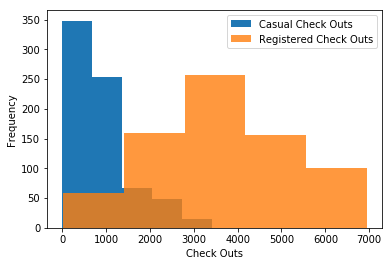

In [75]:
#5

plt.hist(attr[:, 7], 5, alpha =1)
plt.hist(attr[:, 8], 5, alpha = 0.8)

plt.xlabel('Check Outs')
plt.ylabel('Frequency')

plt.legend(['Casual Check Outs','Registered Check Outs'])

plt.show()          #conclusion: Registered Check Outs is normal distribution